In [295]:
# Program extracting first column 
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [296]:
!pip install lifelines

First, we are trying to redo the steps of the Lyu paper, and the first step of that is to load the somatic mutation data

In [297]:
maf_file = "AN_TCGA_LUAD_PAIR_capture_freeze_FINAL_230.aggregated.capture.tcga.uuid.curated.somatic (1).maf"

#=========================================================
# Your code here to load the MAF file and filter mutations
import pandas as pd

pd.set_option('display.max_columns', None)

maf = pd.read_csv(maf_file, sep="\t", comment='#')

maf.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (82,83,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,dbSNP_Val_Status,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,Tumor_Validation_Allele1,Tumor_Validation_Allele2,Match_Norm_Validation_Allele1,Match_Norm_Validation_Allele2,Verification_Status,Validation_Status,Mutation_Status,Sequencing_Phase,Sequence_Source,Validation_Method,Score,BAM_file,Sequencer,Tumor_Sample_UUID,Matched_Norm_Sample_UUID,Genome_Change,Annotation_Transcript,Transcript_Strand,Transcript_Exon,Transcript_Position,cDNA_Change,Codon_Change,Protein_Change,Other_Transcripts,Refseq_mRNA_Id,Refseq_prot_Id,SwissProt_acc_Id,SwissProt_entry_Id,Description,UniProt_AApos,UniProt_Region,UniProt_Site,UniProt_Natural_Variations,UniProt_Experimental_Info,GO_Biological_Process,GO_Cellular_Component,GO_Molecular_Function,COSMIC_overlapping_mutations,COSMIC_fusion_genes,COSMIC_tissue_types_affected,COSMIC_total_alterations_in_gene,Tumorscape_Amplification_Peaks,Tumorscape_Deletion_Peaks,TCGAscape_Amplification_Peaks,TCGAscape_Deletion_Peaks,DrugBank,ref_context,gc_content,ACHILLES_Top_Genes,CCLE_ONCOMAP_overlapping_mutations,CCLE_ONCOMAP_total_mutations_in_gene,CGC_Mutation_Type,CGC_Translocation_Partner,CGC_Tumor_Types_Somatic,CGC_Tumor_Types_Germline,CGC_Other_Diseases,DNARepairGenes_Role,FamilialCancerDatabase_Syndromes,MUTSIG_Published_Results,OREGANNO_ID,OREGANNO_Values,t_alt_count,t_ref_count,validation_status,validation_method,validation_tumor_sample,validation_alt_allele,pox,qox,pox_cutoff,isArtifactMode,oxoGCut
0,PLEKHN1,84069,broad.mit.edu,37,1,905907,905907,+,Missense_Mutation,SNP,A,A,T,NaN,NaN,TCGA-05-4249-01A-01D-1105-08,TCGA-05-4249-10A-01D-1105-08,A,A,-,-,A,A,Unknown,Untested,Somatic,Unspecified,WXS,none,NaN,NaN,Illumina HiSeq,8be717b5-5b65-4631-a175-1f4c063d447e,5d48c4d0-e1bd-4a65-9ecf-b6bad02196d7,g.chr1:905907A>T,uc001ace.2,+,4,372,c.337A>T,c.(337-339)AGC>TGC,p.S113C,PLEKHN1_uc001acd.2_Missense_Mutation_p.S113C|P...,NM_032129,NP_115505,Q494U1,PKHN1_HUMAN,"pleckstrin homology domain containing, family N",113,PH 1.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,all_cancers(77;0.00164)|all_epithelial(69;0.00...,all_epithelial(116;9.48e-15)|all_lung(118;9.67...,NaN,UCEC - Uterine corpus endometrioid carcinoma (...,NaN,GCAGGATGTCAGCGACTGCTA,0.672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,54,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.009535,0.0,0.0
1,UBE2J2,118424,broad.mit.edu,37,1,1192480,1192480,+,Silent,SNP,C,C,A,NaN,NaN,TCGA-05-4249-01A-01D-1105-08,TCGA-05-4249-10A-01D-1105-08,C,C,-,-,C,C,Unknown,Untested,Somatic,Unspecified,WXS,none,NaN,NaN,Illumina HiSeq,8be717b5-5b65-4631-a175-1f4c063d447e,5d48c4d0-e1bd-4a65-9ecf-b6bad02196d7,g.chr1:1192480C>A,uc001adn.2,-,5,616,c.306G>T,c.(304-306)CCG>CCT,p.P102P,UBE2J2_uc001adm.2_Silent_p.P67P|UBE2J2_uc001ad...,NM_194458,NP_919440,Q8N2K1,UB2J2_HUMAN,"ubiquitin conjugating enzyme E2, J2 isoform 3",102,Cytoplasmic (Potential).,NaN,NaN,NaN,response to unfolded protein,endoplasmic reticulum membrane|integral to mem...,ATP binding|ubiquitin-protein ligase activity,NaN,NaN,NaN,0.0,all_cancers(77;0.00164)|all_epithelial(69;0.00...,all_epithelial(116;8.75e-19)|all_lung(118;2.3e...,NaN,Epithelial(90;6.66e-35)|OV - Ovarian serous cy...,NaN,TCCACGTGTCCGGGTGGAAAT,0.642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,145,NaN,NaN,NaN,NaN,2.375320e-16,3.325450e-16,0.014410,1.0,0.0
2,Unknown,0,broad.mit.edu,37,1,1854885,1854885,+,Missense_Mutation,SNP,G,G,C,NaN,NaN,TCGA-05-4249-01A-01D-1105-08,TCGA-05-4249-10A-01D-1105-08,G,G,-,-,G,G,Unknown,Untested,Somatic,Unspecified,WXS,none,NaN,NaN,Illumina HiSeq,8be717b5-5b65-4631-a175-1f4c063d447e,5d48c4d0-e1bd-4a65-9ecf-b6bad02196d7,g.chr1:1854885G>C,uc001aik.2,-,8,1291,c.441C>G,c.(439-441)TTC>TTG,p.F147L,uc001ail.2_Missense_Mutation_p.F147L,NaN,NaN,NaN,NaN,RecName: Full=Uncharacterized protein C1

Now we can filter to only include nonsynonomous mutations (nonsense, nonstop, missense)

In [298]:
variant_list = ['Missense_Mutation','Nonsense_Mutation','Nonstop_Mutation']
maf = maf[maf.Variant_Classification.isin(variant_list)]
display(maf)

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,dbSNP_Val_Status,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,Tumor_Validation_Allele1,Tumor_Validation_Allele2,Match_Norm_Validation_Allele1,Match_Norm_Validation_Allele2,Verification_Status,Validation_Status,Mutation_Status,Sequencing_Phase,Sequence_Source,Validation_Method,Score,BAM_file,Sequencer,Tumor_Sample_UUID,Matched_Norm_Sample_UUID,Genome_Change,Annotation_Transcript,Transcript_Strand,Transcript_Exon,Transcript_Position,cDNA_Change,Codon_Change,Protein_Change,Other_Transcripts,Refseq_mRNA_Id,Refseq_prot_Id,SwissProt_acc_Id,SwissProt_entry_Id,Description,UniProt_AApos,UniProt_Region,UniProt_Site,UniProt_Natural_Variations,UniProt_Experimental_Info,GO_Biological_Process,GO_Cellular_Component,GO_Molecular_Function,COSMIC_overlapping_mutations,COSMIC_fusion_genes,COSMIC_tissue_types_affected,COSMIC_total_alterations_in_gene,Tumorscape_Amplification_Peaks,Tumorscape_Deletion_Peaks,TCGAscape_Amplification_Peaks,TCGAscape_Deletion_Peaks,DrugBank,ref_context,gc_content,ACHILLES_Top_Genes,CCLE_ONCOMAP_overlapping_mutations,CCLE_ONCOMAP_total_mutations_in_gene,CGC_Mutation_Type,CGC_Translocation_Partner,CGC_Tumor_Types_Somatic,CGC_Tumor_Types_Germline,CGC_Other_Diseases,DNARepairGenes_Role,FamilialCancerDatabase_Syndromes,MUTSIG_Published_Results,OREGANNO_ID,OREGANNO_Values,t_alt_count,t_ref_count,validation_status,validation_method,validation_tumor_sample,validation_alt_allele,pox,qox,pox_cutoff,isArtifactMode,oxoGCut
0,PLEKHN1,84069,broad.mit.edu,37,1,905907,905907,+,Missense_Mutation,SNP,A,A,T,NaN,NaN,TCGA-05-4249-01A-01D-1105-08,TCGA-05-4249-10A-01D-1105-08,A,A,-,-,A,A,Unknown,Untested,Somatic,Unspecified,WXS,none,NaN,NaN,Illumina HiSeq,8be717b5-5b65-4631-a175-1f4c063d447e,5d48c4d0-e1bd-4a65-9ecf-b6bad02196d7,g.chr1:905907A>T,uc001ace.2,+,4,372,c.337A>T,c.(337-339)AGC>TGC,p.S113C,PLEKHN1_uc001acd.2_Missense_Mutation_p.S113C|P...,NM_032129,NP_115505,Q494U1,PKHN1_HUMAN,"pleckstrin homology domain containing, family N",113,PH 1.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,all_cancers(77;0.00164)|all_epithelial(69;0.00...,all_epithelial(116;9.48e-15)|all_lung(118;9.67...,NaN,UCEC - Uterine corpus endometrioid carcinoma (...,NaN,GCAGGATGTCAGCGACTGCTA,0.672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,54,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.009535,0.0,0.0
2,Unknown,0,broad.mit.edu,37,1,1854885,1854885,+,Missense_Mutation,SNP,G,G,C,NaN,NaN,TCGA-05-4249-01A-01D-1105-08,TCGA-05-4249-10A-01D-1105-08,G,G,-,-,G,G,Unknown,Untested,Somatic,Unspecified,WXS,none,NaN,NaN,Illumina HiSeq,8be717b5-5b65-4631-a175-1f4c063d447e,5d48c4d0-e1bd-4a65-9ecf-b6bad02196d7,g.chr1:1854885G>C,uc001aik.2,-,8,1291,c.441C>G,c.(439-441)TTC>TTG,p.F147L,uc001ail.2_Missense_Mutation_p.F147L,NaN,NaN,NaN,NaN,RecName: Full=Uncharacterized protein C1orf222;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CGCCCTCCACGAACATCATGT,0.637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,14,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.001984,0.0,0.0
3,C1orf200,644997,broad.mit.edu,37,1,9713992,9713992,+,Missense_Mutation,SNP,G,G,A,NaN,NaN,TCGA-05-4249-01A-01D-1105-08,TCGA-05-4249-10A-01D-1105-08,G,G,-,-,G,G,Unknown,Untested,Somatic,Unspecified,WXS,none,NaN,NaN,Illumina HiSeq,8be717b5-5b65-4631-a175-1f4c063d447e,5d48c4d0-e1bd-4a65-9ecf-b6bad02196d7,g.chr1:9713992G>A,uc001aqc.3,-,2,499,c.349C>T,c.(349-351)CGC>TGC,p.R117C,PIK3CD_uc001aqa.2_Intron|PIK3CD_uc001aqb.3_Intron,NR_027045,NaN,NaN,NaN,RecName: Full=Putative uncharacterized protein...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,all_lung(157;0.222),Renal(390;0.000469)|all_lung(118;0.000521)|Lun...,NaN,UCEC - Uterine corpus endometrioid carcinoma (...,NaN,Ggctgagagcggtagctcata,0.234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,26,NaN,Na

Next step is to look at mutation types: SNP - 1, DNP - 2, TNP - 3

In [299]:
import numpy as np

maf2 = maf[["Hugo_Symbol","Variant_Type","Tumor_Sample_Barcode"]]
#display(maf2)
d = {'SNP': 1, 'DNP': 2, 'TNP': 3}
maf2['Variant_Type2'] = maf2.apply(lambda row: d[row.Variant_Type], axis = 1)
#display(maf2)
#display(maf2.Variant_Type2.unique())
maf2 = maf2.drop(['Variant_Type'], axis=1)
#display(maf2)
maf2["Variant_Type2"] = pd.to_numeric(maf2["Variant_Type2"])
#display(maf.Tumor_Sample_Barcode.nunique())
#display(maf.groupby(['Hugo_Symbol', 'Variant_Type', 'Tumor_Sample_Barcode']))

#Duplication check
#maf3 = maf2.drop(["Variant_Type2"], axis=1)
#display(len(maf3)-len(maf3.drop_duplicates()))

mutation_matrix = maf2.pivot_table(index="Hugo_Symbol",columns="Tumor_Sample_Barcode",values="Variant_Type2",aggfunc=np.sum)
display(mutation_matrix)
#display(mutation_matrix.max())
#display(mutation_matrix.count())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Tumor_Sample_Barcode,TCGA-05-4249-01A-01D-1105-08,TCGA-05-4382-01A-01D-1265-08,TCGA-05-4384-01A-01D-1753-08,TCGA-05-4389-01A-01D-1265-08,TCGA-05-4390-01A-02D-1753-08,TCGA-05-4395-01A-01D-1265-08,TCGA-05-4396-01A-21D-1855-08,TCGA-05-4398-01A-01D-1265-08,TCGA-05-4402-01A-01D-1265-08,TCGA-05-4403-01A-01D-1265-08,TCGA-05-4405-01A-21D-1855-08,TCGA-05-4410-01A-21D-1855-08,TCGA-05-4415-01A-22D-1855-08,TCGA-05-4417-01A-22D-1855-08,TCGA-05-4418-01A-01D-1265-08,TCGA-05-4420-01A-01D-1265-08,TCGA-05-4422-01A-01D-1265-08,TCGA-05-4424-01A-22D-1855-08,TCGA-05-4425-01A-01D-1753-08,TCGA-05-4426-01A-01D-1265-08,TCGA-05-4430-01A-02D-1265-08,TCGA-05-4432-01A-01D-1265-08,TCGA-05-4433-01A-22D-1855-08,TCGA-05-5420-01A-01D-1625-08,TCGA-05-5423-01A-01D-1625-08,TCGA-05-5428-01A-01D-1625-08,TCGA-05-5429-01A-01D-1625-08,TCGA-05-5715-01A-01D-1625-08,TCGA-35-3615-01A-01D-1040-01,TCGA-38-4626-01A-01D-1553-08,TCGA-38-4627-01A-01D-1553-08,TCGA-38-4628-01A-01D-1265-08,TCGA-38-4631-01A-01D-1753-08,TCGA-38-4632-01A-01D-1753-08,TCGA-38-6178-01A-11D-1753-08,TCGA-44-2655-01A-01D-1553-08,TCGA-44-2656-01A-02W-0928-08,TCGA-44-2657-01A-01D-1105-08,TCGA-44-2659-01A-01D-0969-08,TCGA-44-2661-01A-01D-1105-08,TCGA-44-2662-01A-01D-0969-08,TCGA-44-2665-01A-01D-1040-01,TCGA-44-2666-01A-01D-1489-08,TCGA-44-3396-01A-01D-1265-08,TCGA-44-3919-01A-02D-1458-08,TCGA-44-4112-01A-01D-1105-08,TCGA-44-5645-01A-01D-1625-08,TCGA-44-6145-01A-11D-1753-08,TCGA-44-6146-01A-11D-1753-08,TCGA-44-6147-01A-11D-1753-08,TCGA-44-6774-01A-21D-1855-08,TCGA-44-6775-01A-11D-1855-08,TCGA-44-6776-01A-11D-1855-08,TCGA-44-6777-01A-11D-1855-08,TCGA-44-6779-01A-11D-1855-08,TCGA-44-7659-01A-11D-2063-08,TCGA-44-7662-01A-11D-2063-08,TCGA-44-7670-01A-11D-2063-08,TCGA-44-7671-01A-11D-2063-08,TCGA-44-7672-01A-11D-2063-08,TCGA-49-4486-01A-01D-1265-08,TCGA-49-4487-01A-21D-1855-08,TCGA-49-4488-01A-01D-1753-08,TCGA-49-4490-01A-21D-1855-08,TCGA-49-4494-01A-01D-1265-08,TCGA-49-4501-01A-01D-1265-08,TCGA-49-4505-01A-01D-1265-08,TCGA-49-4506-01A-01D-1265-08,TCGA-49-4507-01A-01D-1265-08,TCGA-49-4510-01A-01D-1265-08,TCGA-49-4512-01A-21D-1855-08,TCGA-49-4514-01A-21D-1855-08,TCGA-49-6742-01A-11D-1855-08,TCGA-49-6744-01A-11D-1855-08,TCGA-49-6745-01A-11D-1855-08,TCGA-49-6761-01A-31D-1945-08,TCGA-49-6767-01A-11D-1855-08,TCGA-50-5044-01A-21D-1855-08,TCGA-50-5049-01A-01D-1625-08,TCGA-50-5051-01A-21D-1855-08,TCGA-50-5055-01A-01D-1625-08,TCGA-50-5068-01A-01D-1625-08,TCGA-50-5072-01A-21D-1855-08,TCGA-50-5931-01A-11D-1753-08,TCGA-50-5932-01A-11D-1753-08,TCGA-50-5933-01A-11D-1753-08,TCGA-50-5935-01A-11D-1753-08,TCGA-50-5936-01A-11D-1625-08,TCGA-50-5939-01A-11D-1625-08,TCGA-50-5941-01A-11D-1753-08,TCGA-50-5942-01A-21D-1753-08,TCGA-50-5944-01A-11D-1753-08,TCGA-50-6593-01A-11D-1753-08,TCGA-50-6595-01A-12D-1855-08,TCGA-50-6597-01A-11D-1855-08,TCGA-50-6673-01A-11D-1945-08,TCGA-50-7109-01A-11D-2036-08,TCGA-53-7626-01A-12D-2063-08,TCGA-53-7813-01A-11D-2167-08,TCGA-55-1592-01A-01D-0969-08,TCGA-55-1594-01A-01D-1040-01,TCGA-55-1596-01A-01D-1040-01,TCGA-55-6543-01A-11D-1753-08,TCGA-55-6642-01A-11D-1855-08,TCGA-55-6712-01A-11D-1855-08,TCGA-55-6970-01A-11D-1945-08,TCGA-55-6971-01A-11D-1945-08,TCGA-55-6972-01A-11D-1945-08,TCGA-55-6978-01A-11D-1945-08,TCGA-55-6979-01A-11D-1945-08,TCGA-55-6980-01A-11D-1945-08,TCGA-55-6981-01A-11D-1945-08,TCGA-55-6982-01A-11D-1945-08,TCGA-55-6983-01A-11D-1945-08,TCGA-55-6985-01A-11D-1945-08,TCGA-55-6986-01A-11D-1945-08,TCGA-55-7281-01A-11D-2036-08,TCGA-55-7283-01A-11D-2036-08,TCGA-55-7573-01A-11D-2036-08,TCGA-55-7574-01A-11D-2036-08,TCGA-55-7576-01A-11D-2063-08,TCGA-55-7724-01A-11D-2167-08,TCGA-55-7725-01A-11D-2167-08,TCGA-55-7726-01A-11D-2167-08,TCGA-55-7727-01A-11D-2167-08,TCGA-55-7728-01A-11D-2184-08,TCGA-55-7815-01A-11D-2167-08,TCGA-55-7903-01A-11D-2167-08,TCGA-55-7907-01A-11D-2167-08,TCGA-55-7911-01A-11D-2167-08,TCGA-55-7914-01A-11D-2167-08,TCGA-64-1676-01A-01D-0969-08,TCGA-64-1677-01A-01W-0928-08,TCGA-64-1678-01A-01W-0928-08,TCGA-64-1679-01A-21D-2063-08,TCGA-64-1680-01A-02D-0969-08,TCGA-64-1681-01A-11D-2063-08,TCGA-6

In [0]:
#Saving to a csv for later
mutation_matrix.to_csv('mutation_matrix.csv')

Now that the mutation matrix has been generated, the next step is to identify candidate genes using the same criteria as in the Lyu paper

In [300]:
# First let's find the mutation frequency
mut_freq = mutation_matrix
mut_freq['Counts'] = mutation_matrix.sum(axis=1)
mut_freq['Counts'] = mut_freq['Counts']/230
#mut_freq = mut_freq['Counts']
display(mut_freq)

Tumor_Sample_Barcode,TCGA-05-4249-01A-01D-1105-08,TCGA-05-4382-01A-01D-1265-08,TCGA-05-4384-01A-01D-1753-08,TCGA-05-4389-01A-01D-1265-08,TCGA-05-4390-01A-02D-1753-08,TCGA-05-4395-01A-01D-1265-08,TCGA-05-4396-01A-21D-1855-08,TCGA-05-4398-01A-01D-1265-08,TCGA-05-4402-01A-01D-1265-08,TCGA-05-4403-01A-01D-1265-08,TCGA-05-4405-01A-21D-1855-08,TCGA-05-4410-01A-21D-1855-08,TCGA-05-4415-01A-22D-1855-08,TCGA-05-4417-01A-22D-1855-08,TCGA-05-4418-01A-01D-1265-08,TCGA-05-4420-01A-01D-1265-08,TCGA-05-4422-01A-01D-1265-08,TCGA-05-4424-01A-22D-1855-08,TCGA-05-4425-01A-01D-1753-08,TCGA-05-4426-01A-01D-1265-08,TCGA-05-4430-01A-02D-1265-08,TCGA-05-4432-01A-01D-1265-08,TCGA-05-4433-01A-22D-1855-08,TCGA-05-5420-01A-01D-1625-08,TCGA-05-5423-01A-01D-1625-08,TCGA-05-5428-01A-01D-1625-08,TCGA-05-5429-01A-01D-1625-08,TCGA-05-5715-01A-01D-1625-08,TCGA-35-3615-01A-01D-1040-01,TCGA-38-4626-01A-01D-1553-08,TCGA-38-4627-01A-01D-1553-08,TCGA-38-4628-01A-01D-1265-08,TCGA-38-4631-01A-01D-1753-08,TCGA-38-4632-01A-01D-1753-08,TCGA-38-6178-01A-11D-1753-08,TCGA-44-2655-01A-01D-1553-08,TCGA-44-2656-01A-02W-0928-08,TCGA-44-2657-01A-01D-1105-08,TCGA-44-2659-01A-01D-0969-08,TCGA-44-2661-01A-01D-1105-08,TCGA-44-2662-01A-01D-0969-08,TCGA-44-2665-01A-01D-1040-01,TCGA-44-2666-01A-01D-1489-08,TCGA-44-3396-01A-01D-1265-08,TCGA-44-3919-01A-02D-1458-08,TCGA-44-4112-01A-01D-1105-08,TCGA-44-5645-01A-01D-1625-08,TCGA-44-6145-01A-11D-1753-08,TCGA-44-6146-01A-11D-1753-08,TCGA-44-6147-01A-11D-1753-08,TCGA-44-6774-01A-21D-1855-08,TCGA-44-6775-01A-11D-1855-08,TCGA-44-6776-01A-11D-1855-08,TCGA-44-6777-01A-11D-1855-08,TCGA-44-6779-01A-11D-1855-08,TCGA-44-7659-01A-11D-2063-08,TCGA-44-7662-01A-11D-2063-08,TCGA-44-7670-01A-11D-2063-08,TCGA-44-7671-01A-11D-2063-08,TCGA-44-7672-01A-11D-2063-08,TCGA-49-4486-01A-01D-1265-08,TCGA-49-4487-01A-21D-1855-08,TCGA-49-4488-01A-01D-1753-08,TCGA-49-4490-01A-21D-1855-08,TCGA-49-4494-01A-01D-1265-08,TCGA-49-4501-01A-01D-1265-08,TCGA-49-4505-01A-01D-1265-08,TCGA-49-4506-01A-01D-1265-08,TCGA-49-4507-01A-01D-1265-08,TCGA-49-4510-01A-01D-1265-08,TCGA-49-4512-01A-21D-1855-08,TCGA-49-4514-01A-21D-1855-08,TCGA-49-6742-01A-11D-1855-08,TCGA-49-6744-01A-11D-1855-08,TCGA-49-6745-01A-11D-1855-08,TCGA-49-6761-01A-31D-1945-08,TCGA-49-6767-01A-11D-1855-08,TCGA-50-5044-01A-21D-1855-08,TCGA-50-5049-01A-01D-1625-08,TCGA-50-5051-01A-21D-1855-08,TCGA-50-5055-01A-01D-1625-08,TCGA-50-5068-01A-01D-1625-08,TCGA-50-5072-01A-21D-1855-08,TCGA-50-5931-01A-11D-1753-08,TCGA-50-5932-01A-11D-1753-08,TCGA-50-5933-01A-11D-1753-08,TCGA-50-5935-01A-11D-1753-08,TCGA-50-5936-01A-11D-1625-08,TCGA-50-5939-01A-11D-1625-08,TCGA-50-5941-01A-11D-1753-08,TCGA-50-5942-01A-21D-1753-08,TCGA-50-5944-01A-11D-1753-08,TCGA-50-6593-01A-11D-1753-08,TCGA-50-6595-01A-12D-1855-08,TCGA-50-6597-01A-11D-1855-08,TCGA-50-6673-01A-11D-1945-08,TCGA-50-7109-01A-11D-2036-08,TCGA-53-7626-01A-12D-2063-08,TCGA-53-7813-01A-11D-2167-08,TCGA-55-1592-01A-01D-0969-08,TCGA-55-1594-01A-01D-1040-01,TCGA-55-1596-01A-01D-1040-01,TCGA-55-6543-01A-11D-1753-08,TCGA-55-6642-01A-11D-1855-08,TCGA-55-6712-01A-11D-1855-08,TCGA-55-6970-01A-11D-1945-08,TCGA-55-6971-01A-11D-1945-08,TCGA-55-6972-01A-11D-1945-08,TCGA-55-6978-01A-11D-1945-08,TCGA-55-6979-01A-11D-1945-08,TCGA-55-6980-01A-11D-1945-08,TCGA-55-6981-01A-11D-1945-08,TCGA-55-6982-01A-11D-1945-08,TCGA-55-6983-01A-11D-1945-08,TCGA-55-6985-01A-11D-1945-08,TCGA-55-6986-01A-11D-1945-08,TCGA-55-7281-01A-11D-2036-08,TCGA-55-7283-01A-11D-2036-08,TCGA-55-7573-01A-11D-2036-08,TCGA-55-7574-01A-11D-2036-08,TCGA-55-7576-01A-11D-2063-08,TCGA-55-7724-01A-11D-2167-08,TCGA-55-7725-01A-11D-2167-08,TCGA-55-7726-01A-11D-2167-08,TCGA-55-7727-01A-11D-2167-08,TCGA-55-7728-01A-11D-2184-08,TCGA-55-7815-01A-11D-2167-08,TCGA-55-7903-01A-11D-2167-08,TCGA-55-7907-01A-11D-2167-08,TCGA-55-7911-01A-11D-2167-08,TCGA-55-7914-01A-11D-2167-08,TCGA-64-1676-01A-01D-0969-08,TCGA-64-1677-01A-01W-0928-08,TCGA-64-1678-01A-01W-0928-08,TCGA-64-1679-01A-21D-2063-08,TCGA-64-1680-01A-02D-0969-08,TCGA-64-1681-01A-11D-2063-08,TCGA-6

In [301]:
#Next, let's find the CDS lengths
#Couldn't figure out how to download both simultaneously, so have to combine Hugo IDs with CDS lengths

import csv

hugo_file = "hugo_ids2.txt"
cds_file = "cdslengths2.txt"
hugo_data = pd.read_csv(hugo_file)
cds_data = pd.read_csv(cds_file)
cds_combined = hugo_data.merge(cds_data)
cds_combined = cds_combined.drop(['Gene stable ID'], axis=1)
cds_combined = cds_combined[cds_combined['HGNC symbol'].isin(mut_freq.index)]
#display(cds_combined)
#cds_combined.drop_duplicates(subset='HGNC symbol', keep='first', inplace=True)
cds_combined = cds_combined.sort_values('CDS Length', ascending=False).drop_duplicates('HGNC symbol').sort_index()
cds_combined = cds_combined.rename(columns={"HGNC symbol": "Hugo_Symbol", "CDS Length": "CDS"})
cds_combined = cds_combined.set_index('Hugo_Symbol')

cds_combined = cds_combined.reindex(mut_freq.index)
#display(cds_combined)
#print(cds_combined.to_string())
candidate_genes = mut_freq.merge(cds_combined, left_on='Hugo_Symbol', right_on='Hugo_Symbol')
display(candidate_genes)

,TCGA-05-4249-01A-01D-1105-08,TCGA-05-4382-01A-01D-1265-08,TCGA-05-4384-01A-01D-1753-08,TCGA-05-4389-01A-01D-1265-08,TCGA-05-4390-01A-02D-1753-08,TCGA-05-4395-01A-01D-1265-08,TCGA-05-4396-01A-21D-1855-08,TCGA-05-4398-01A-01D-1265-08,TCGA-05-4402-01A-01D-1265-08,TCGA-05-4403-01A-01D-1265-08,TCGA-05-4405-01A-21D-1855-08,TCGA-05-4410-01A-21D-1855-08,TCGA-05-4415-01A-22D-1855-08,TCGA-05-4417-01A-22D-1855-08,TCGA-05-4418-01A-01D-1265-08,TCGA-05-4420-01A-01D-1265-08,TCGA-05-4422-01A-01D-1265-08,TCGA-05-4424-01A-22D-1855-08,TCGA-05-4425-01A-01D-1753-08,TCGA-05-4426-01A-01D-1265-08,TCGA-05-4430-01A-02D-1265-08,TCGA-05-4432-01A-01D-1265-08,TCGA-05-4433-01A-22D-1855-08,TCGA-05-5420-01A-01D-1625-08,TCGA-05-5423-01A-01D-1625-08,TCGA-05-5428-01A-01D-1625-08,TCGA-05-5429-01A-01D-1625-08,TCGA-05-5715-01A-01D-1625-08,TCGA-35-3615-01A-01D-1040-01,TCGA-38-4626-01A-01D-1553-08,TCGA-38-4627-01A-01D-1553-08,TCGA-38-4628-01A-01D-1265-08,TCGA-38-4631-01A-01D-1753-08,TCGA-38-4632-01A-01D-1753-08,TCGA-38-6178-01A-11D-1753-08,TCGA-44-2655-01A-01D-1553-08,TCGA-44-2656-01A-02W-0928-08,TCGA-44-2657-01A-01D-1105-08,TCGA-44-2659-01A-01D-0969-08,TCGA-44-2661-01A-01D-1105-08,TCGA-44-2662-01A-01D-0969-08,TCGA-44-2665-01A-01D-1040-01,TCGA-44-2666-01A-01D-1489-08,TCGA-44-3396-01A-01D-1265-08,TCGA-44-3919-01A-02D-1458-08,TCGA-44-4112-01A-01D-1105-08,TCGA-44-5645-01A-01D-1625-08,TCGA-44-6145-01A-11D-1753-08,TCGA-44-6146-01A-11D-1753-08,TCGA-44-6147-01A-11D-1753-08,TCGA-44-6774-01A-21D-1855-08,TCGA-44-6775-01A-11D-1855-08,TCGA-44-6776-01A-11D-1855-08,TCGA-44-6777-01A-11D-1855-08,TCGA-44-6779-01A-11D-1855-08,TCGA-44-7659-01A-11D-2063-08,TCGA-44-7662-01A-11D-2063-08,TCGA-44-7670-01A-11D-2063-08,TCGA-44-7671-01A-11D-2063-08,TCGA-44-7672-01A-11D-2063-08,TCGA-49-4486-01A-01D-1265-08,TCGA-49-4487-01A-21D-1855-08,TCGA-49-4488-01A-01D-1753-08,TCGA-49-4490-01A-21D-1855-08,TCGA-49-4494-01A-01D-1265-08,TCGA-49-4501-01A-01D-1265-08,TCGA-49-4505-01A-01D-1265-08,TCGA-49-4506-01A-01D-1265-08,TCGA-49-4507-01A-01D-1265-08,TCGA-49-4510-01A-01D-1265-08,TCGA-49-4512-01A-21D-1855-08,TCGA-49-4514-01A-21D-1855-08,TCGA-49-6742-01A-11D-1855-08,TCGA-49-6744-01A-11D-1855-08,TCGA-49-6745-01A-11D-1855-08,TCGA-49-6761-01A-31D-1945-08,TCGA-49-6767-01A-11D-1855-08,TCGA-50-5044-01A-21D-1855-08,TCGA-50-5049-01A-01D-1625-08,TCGA-50-5051-01A-21D-1855-08,TCGA-50-5055-01A-01D-1625-08,TCGA-50-5068-01A-01D-1625-08,TCGA-50-5072-01A-21D-1855-08,TCGA-50-5931-01A-11D-1753-08,TCGA-50-5932-01A-11D-1753-08,TCGA-50-5933-01A-11D-1753-08,TCGA-50-5935-01A-11D-1753-08,TCGA-50-5936-01A-11D-1625-08,TCGA-50-5939-01A-11D-1625-08,TCGA-50-5941-01A-11D-1753-08,TCGA-50-5942-01A-21D-1753-08,TCGA-50-5944-01A-11D-1753-08,TCGA-50-6593-01A-11D-1753-08,TCGA-50-6595-01A-12D-1855-08,TCGA-50-6597-01A-11D-1855-08,TCGA-50-6673-01A-11D-1945-08,TCGA-50-7109-01A-11D-2036-08,TCGA-53-7626-01A-12D-2063-08,TCGA-53-7813-01A-11D-2167-08,TCGA-55-1592-01A-01D-0969-08,TCGA-55-1594-01A-01D-1040-01,TCGA-55-1596-01A-01D-1040-01,TCGA-55-6543-01A-11D-1753-08,TCGA-55-6642-01A-11D-1855-08,TCGA-55-6712-01A-11D-1855-08,TCGA-55-6970-01A-11D-1945-08,TCGA-55-6971-01A-11D-1945-08,TCGA-55-6972-01A-11D-1945-08,TCGA-55-6978-01A-11D-1945-08,TCGA-55-6979-01A-11D-1945-08,TCGA-55-6980-01A-11D-1945-08,TCGA-55-6981-01A-11D-1945-08,TCGA-55-6982-01A-11D-1945-08,TCGA-55-6983-01A-11D-1945-08,TCGA-55-6985-01A-11D-1945-08,TCGA-55-6986-01A-11D-1945-08,TCGA-55-7281-01A-11D-2036-08,TCGA-55-7283-01A-11D-2036-08,TCGA-55-7573-01A-11D-2036-08,TCGA-55-7574-01A-11D-2036-08,TCGA-55-7576-01A-11D-2063-08,TCGA-55-7724-01A-11D-2167-08,TCGA-55-7725-01A-11D-2167-08,TCGA-55-7726-01A-11D-2167-08,TCGA-55-7727-01A-11D-2167-08,TCGA-55-7728-01A-11D-2184-08,TCGA-55-7815-01A-11D-2167-08,TCGA-55-7903-01A-11D-2167-08,TCGA-55-7907-01A-11D-2167-08,TCGA-55-7911-01A-11D-2167-08,TCGA-55-7914-01A-11D-2167-08,TCGA-64-1676-01A-01D-0969-08,TCGA-64-1677-01A-01W-0928-08,TCGA-64-1678-01A-01W-0928-08,TCGA-64-1679-01A-21D-2063-08,TCGA-64-1680-01A-02D-0969-08,TCGA-64-1681-01A-11D-2063-08,TCGA-64-5774-01A-01D-1625-

In [302]:
# Next, time to do wilcoxon rank sum test
# sorry for the mess, I had a lot of trouble with this part
from scipy.stats import ranksums
wilcox_df = mutation_matrix.drop(['Counts'],axis=1)
#display(mutation_matrix)
wilcox_df2 = mutation_matrix.drop(['Counts'],axis=1)
#display(wilcox_df)
patient_mutation_loads = wilcox_df.sum(axis=0)
wilcox_df['p'] = np.nan
wilcox_df2['p'] = np.nan
#display(wilcox_df)
#display(wilcox_df2)
#patient_mutation_loads = patient_mutation_loads.reset_index()
display(patient_mutation_loads)
#wilcox_df = wilcox_df.drop(['Hugo_Symbol'],axis=1) np.delete(a, np.s_[-1:], axis=1)
for index, row in wilcox_df.iterrows():
  mutants = np.delete(np.array(np.isnan(row)), -1)
  wild = np.delete(np.array(~np.isnan(row)), -1)
  wilcox = ranksums(patient_mutation_loads[mutants],patient_mutation_loads[wild])
  wilcox_df.loc[index,'p'] = wilcox[1]
display(wilcox_df)

# I can't get Bonferroni correction working properly for some reason, and can't find any online resources
# to troubleshoot, so unfortunately, I'm going to proceed with the raw p-values
#from statsmodels.sandbox.stats.multicomp import multipletests
#wilcox_df['p-adjusted'] = np.nan
#xx = multipletests(wilcox_df['p'], alpha=0.05, method='bonferroni')
#display(xx[0])
#display(xx[1])
#display(xx[2])

Tumor_Sample_Barcode
TCGA-05-4249-01A-01D-1105-08     288.0
TCGA-05-4382-01A-01D-1265-08    1279.0
TCGA-05-4384-01A-01D-1753-08     120.0
TCGA-05-4389-01A-01D-1265-08     215.0
TCGA-05-4390-01A-02D-1753-08     481.0
                                 ...  
TCGA-97-7554-01A-11D-2036-08     378.0
TCGA-97-7937-01A-11D-2167-08     393.0
TCGA-97-7938-01A-11D-2167-08     328.0
TCGA-97-7941-01A-11D-2184-08      76.0
TCGA-99-7458-01A-11D-2036-08     397.0
Length: 230, dtype: float64

Tumor_Sample_Barcode,TCGA-05-4249-01A-01D-1105-08,TCGA-05-4382-01A-01D-1265-08,TCGA-05-4384-01A-01D-1753-08,TCGA-05-4389-01A-01D-1265-08,TCGA-05-4390-01A-02D-1753-08,TCGA-05-4395-01A-01D-1265-08,TCGA-05-4396-01A-21D-1855-08,TCGA-05-4398-01A-01D-1265-08,TCGA-05-4402-01A-01D-1265-08,TCGA-05-4403-01A-01D-1265-08,TCGA-05-4405-01A-21D-1855-08,TCGA-05-4410-01A-21D-1855-08,TCGA-05-4415-01A-22D-1855-08,TCGA-05-4417-01A-22D-1855-08,TCGA-05-4418-01A-01D-1265-08,TCGA-05-4420-01A-01D-1265-08,TCGA-05-4422-01A-01D-1265-08,TCGA-05-4424-01A-22D-1855-08,TCGA-05-4425-01A-01D-1753-08,TCGA-05-4426-01A-01D-1265-08,TCGA-05-4430-01A-02D-1265-08,TCGA-05-4432-01A-01D-1265-08,TCGA-05-4433-01A-22D-1855-08,TCGA-05-5420-01A-01D-1625-08,TCGA-05-5423-01A-01D-1625-08,TCGA-05-5428-01A-01D-1625-08,TCGA-05-5429-01A-01D-1625-08,TCGA-05-5715-01A-01D-1625-08,TCGA-35-3615-01A-01D-1040-01,TCGA-38-4626-01A-01D-1553-08,TCGA-38-4627-01A-01D-1553-08,TCGA-38-4628-01A-01D-1265-08,TCGA-38-4631-01A-01D-1753-08,TCGA-38-4632-01A-01D-1753-08,TCGA-38-6178-01A-11D-1753-08,TCGA-44-2655-01A-01D-1553-08,TCGA-44-2656-01A-02W-0928-08,TCGA-44-2657-01A-01D-1105-08,TCGA-44-2659-01A-01D-0969-08,TCGA-44-2661-01A-01D-1105-08,TCGA-44-2662-01A-01D-0969-08,TCGA-44-2665-01A-01D-1040-01,TCGA-44-2666-01A-01D-1489-08,TCGA-44-3396-01A-01D-1265-08,TCGA-44-3919-01A-02D-1458-08,TCGA-44-4112-01A-01D-1105-08,TCGA-44-5645-01A-01D-1625-08,TCGA-44-6145-01A-11D-1753-08,TCGA-44-6146-01A-11D-1753-08,TCGA-44-6147-01A-11D-1753-08,TCGA-44-6774-01A-21D-1855-08,TCGA-44-6775-01A-11D-1855-08,TCGA-44-6776-01A-11D-1855-08,TCGA-44-6777-01A-11D-1855-08,TCGA-44-6779-01A-11D-1855-08,TCGA-44-7659-01A-11D-2063-08,TCGA-44-7662-01A-11D-2063-08,TCGA-44-7670-01A-11D-2063-08,TCGA-44-7671-01A-11D-2063-08,TCGA-44-7672-01A-11D-2063-08,TCGA-49-4486-01A-01D-1265-08,TCGA-49-4487-01A-21D-1855-08,TCGA-49-4488-01A-01D-1753-08,TCGA-49-4490-01A-21D-1855-08,TCGA-49-4494-01A-01D-1265-08,TCGA-49-4501-01A-01D-1265-08,TCGA-49-4505-01A-01D-1265-08,TCGA-49-4506-01A-01D-1265-08,TCGA-49-4507-01A-01D-1265-08,TCGA-49-4510-01A-01D-1265-08,TCGA-49-4512-01A-21D-1855-08,TCGA-49-4514-01A-21D-1855-08,TCGA-49-6742-01A-11D-1855-08,TCGA-49-6744-01A-11D-1855-08,TCGA-49-6745-01A-11D-1855-08,TCGA-49-6761-01A-31D-1945-08,TCGA-49-6767-01A-11D-1855-08,TCGA-50-5044-01A-21D-1855-08,TCGA-50-5049-01A-01D-1625-08,TCGA-50-5051-01A-21D-1855-08,TCGA-50-5055-01A-01D-1625-08,TCGA-50-5068-01A-01D-1625-08,TCGA-50-5072-01A-21D-1855-08,TCGA-50-5931-01A-11D-1753-08,TCGA-50-5932-01A-11D-1753-08,TCGA-50-5933-01A-11D-1753-08,TCGA-50-5935-01A-11D-1753-08,TCGA-50-5936-01A-11D-1625-08,TCGA-50-5939-01A-11D-1625-08,TCGA-50-5941-01A-11D-1753-08,TCGA-50-5942-01A-21D-1753-08,TCGA-50-5944-01A-11D-1753-08,TCGA-50-6593-01A-11D-1753-08,TCGA-50-6595-01A-12D-1855-08,TCGA-50-6597-01A-11D-1855-08,TCGA-50-6673-01A-11D-1945-08,TCGA-50-7109-01A-11D-2036-08,TCGA-53-7626-01A-12D-2063-08,TCGA-53-7813-01A-11D-2167-08,TCGA-55-1592-01A-01D-0969-08,TCGA-55-1594-01A-01D-1040-01,TCGA-55-1596-01A-01D-1040-01,TCGA-55-6543-01A-11D-1753-08,TCGA-55-6642-01A-11D-1855-08,TCGA-55-6712-01A-11D-1855-08,TCGA-55-6970-01A-11D-1945-08,TCGA-55-6971-01A-11D-1945-08,TCGA-55-6972-01A-11D-1945-08,TCGA-55-6978-01A-11D-1945-08,TCGA-55-6979-01A-11D-1945-08,TCGA-55-6980-01A-11D-1945-08,TCGA-55-6981-01A-11D-1945-08,TCGA-55-6982-01A-11D-1945-08,TCGA-55-6983-01A-11D-1945-08,TCGA-55-6985-01A-11D-1945-08,TCGA-55-6986-01A-11D-1945-08,TCGA-55-7281-01A-11D-2036-08,TCGA-55-7283-01A-11D-2036-08,TCGA-55-7573-01A-11D-2036-08,TCGA-55-7574-01A-11D-2036-08,TCGA-55-7576-01A-11D-2063-08,TCGA-55-7724-01A-11D-2167-08,TCGA-55-7725-01A-11D-2167-08,TCGA-55-7726-01A-11D-2167-08,TCGA-55-7727-01A-11D-2167-08,TCGA-55-7728-01A-11D-2184-08,TCGA-55-7815-01A-11D-2167-08,TCGA-55-7903-01A-11D-2167-08,TCGA-55-7907-01A-11D-2167-08,TCGA-55-7911-01A-11D-2167-08,TCGA-55-7914-01A-11D-2167-08,TCGA-64-1676-01A-01D-0969-08,TCGA-64-1677-01A-01W-0928-08,TCGA-64-1678-01A-01W-0928-08,TCGA-64-1679-01A-21D-2063-08,TCGA-64-1680-01A-02D-0969-08,TCGA-64-1681-01A-11D-2063-08,TCGA-6

In [303]:
candidate_genes2 = candidate_genes.merge(wilcox_df, left_on='Hugo_Symbol', right_on='Hugo_Symbol')
#display(candidate_genes2)
candidate_genes3 = candidate_genes2[['CDS','Counts','p','NCBI gene ID']]
#display(candidate_genes3)
# now we can use the constraints
candidate_genes3["CDS"] = pd.to_numeric(candidate_genes3["CDS"])
candidate_genes3["CDS"].fillna(0, inplace=True)
candidate_genes3 = candidate_genes3.loc[candidate_genes3.CDS <= 15000]
candidate_genes3 = candidate_genes3.loc[candidate_genes3.Counts >= 0.1]

# I was looking through the gene set that was generated, and it looks like I can make up
# for the Bonferroni correction I didn't know how to put in through dividing by aboout 50000
candidate_genes3 = candidate_genes3.loc[candidate_genes3.p < 0.5/100000]
candidate_genes3 = candidate_genes3.loc[candidate_genes3.CDS != 0]

#there was an issue that some of the candidate genes were not included in the Rizvi data set
# I imported that data later in the document, but now I'm going to go back and filter right now.
display(candidate_genes3)
candidate_genes3 = candidate_genes3[candidate_genes3.index.isin(riz.Gene.unique())]
display(candidate_genes3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,CDS,Counts,p,NCBI gene ID
Hugo_Symbol,,,,
ADAMTS12,4785.0,0.226087,3.948764e-10,81792.0
ANK2,11988.0,0.191304,3.256137e-07,287.0
APOB,13692.0,0.213043,2.143867e-10,338.0
ASPM,10434.0,0.139130,2.234243e-07,259266.0
ASTN1,3885.0,0.160870,8.096932e-07,460.0
...,...,...,...,...
ZNF208,3843.0,0.108696,1.154468e-07,7757.0
ZNF521,3936.0,0.130435,2.628390e-07,25925.0
ZNF536,3903.0,0.213043,5.387452e-08,9745.0


,CDS,Counts,p,NCBI gene ID
Hugo_Symbol,,,,
ADAMTS12,4785.0,0.226087,3.948764e-10,81792.0
ANK2,11988.0,0.191304,3.256137e-07,287.0
APOB,13692.0,0.213043,2.143867e-10,338.0
ASPM,10434.0,0.139130,2.234243e-07,259266.0
ASTN1,3885.0,0.160870,8.096932e-07,460.0
...,...,...,...,...
ZFHX4,10851.0,0.404348,7.270670e-12,79776.0
ZNF208,3843.0,0.108696,1.154468e-07,7757.0
ZNF536,3903.0,0.213043,5.387452e-08,9745.0


It seems that most of the genes found in Lyu Supplementary Table 1 have been identified through my constraints. Unfortunately, it seems that some were lost, which I think was a result of the difficulties I had in downloading the correct data from the Ensembl Database.

In [304]:
#display(mutation_matrix)
mutation_matrix = mutation_matrix.drop("Counts", axis=1)
display(mutation_matrix)

Tumor_Sample_Barcode,TCGA-05-4249-01A-01D-1105-08,TCGA-05-4382-01A-01D-1265-08,TCGA-05-4384-01A-01D-1753-08,TCGA-05-4389-01A-01D-1265-08,TCGA-05-4390-01A-02D-1753-08,TCGA-05-4395-01A-01D-1265-08,TCGA-05-4396-01A-21D-1855-08,TCGA-05-4398-01A-01D-1265-08,TCGA-05-4402-01A-01D-1265-08,TCGA-05-4403-01A-01D-1265-08,TCGA-05-4405-01A-21D-1855-08,TCGA-05-4410-01A-21D-1855-08,TCGA-05-4415-01A-22D-1855-08,TCGA-05-4417-01A-22D-1855-08,TCGA-05-4418-01A-01D-1265-08,TCGA-05-4420-01A-01D-1265-08,TCGA-05-4422-01A-01D-1265-08,TCGA-05-4424-01A-22D-1855-08,TCGA-05-4425-01A-01D-1753-08,TCGA-05-4426-01A-01D-1265-08,TCGA-05-4430-01A-02D-1265-08,TCGA-05-4432-01A-01D-1265-08,TCGA-05-4433-01A-22D-1855-08,TCGA-05-5420-01A-01D-1625-08,TCGA-05-5423-01A-01D-1625-08,TCGA-05-5428-01A-01D-1625-08,TCGA-05-5429-01A-01D-1625-08,TCGA-05-5715-01A-01D-1625-08,TCGA-35-3615-01A-01D-1040-01,TCGA-38-4626-01A-01D-1553-08,TCGA-38-4627-01A-01D-1553-08,TCGA-38-4628-01A-01D-1265-08,TCGA-38-4631-01A-01D-1753-08,TCGA-38-4632-01A-01D-1753-08,TCGA-38-6178-01A-11D-1753-08,TCGA-44-2655-01A-01D-1553-08,TCGA-44-2656-01A-02W-0928-08,TCGA-44-2657-01A-01D-1105-08,TCGA-44-2659-01A-01D-0969-08,TCGA-44-2661-01A-01D-1105-08,TCGA-44-2662-01A-01D-0969-08,TCGA-44-2665-01A-01D-1040-01,TCGA-44-2666-01A-01D-1489-08,TCGA-44-3396-01A-01D-1265-08,TCGA-44-3919-01A-02D-1458-08,TCGA-44-4112-01A-01D-1105-08,TCGA-44-5645-01A-01D-1625-08,TCGA-44-6145-01A-11D-1753-08,TCGA-44-6146-01A-11D-1753-08,TCGA-44-6147-01A-11D-1753-08,TCGA-44-6774-01A-21D-1855-08,TCGA-44-6775-01A-11D-1855-08,TCGA-44-6776-01A-11D-1855-08,TCGA-44-6777-01A-11D-1855-08,TCGA-44-6779-01A-11D-1855-08,TCGA-44-7659-01A-11D-2063-08,TCGA-44-7662-01A-11D-2063-08,TCGA-44-7670-01A-11D-2063-08,TCGA-44-7671-01A-11D-2063-08,TCGA-44-7672-01A-11D-2063-08,TCGA-49-4486-01A-01D-1265-08,TCGA-49-4487-01A-21D-1855-08,TCGA-49-4488-01A-01D-1753-08,TCGA-49-4490-01A-21D-1855-08,TCGA-49-4494-01A-01D-1265-08,TCGA-49-4501-01A-01D-1265-08,TCGA-49-4505-01A-01D-1265-08,TCGA-49-4506-01A-01D-1265-08,TCGA-49-4507-01A-01D-1265-08,TCGA-49-4510-01A-01D-1265-08,TCGA-49-4512-01A-21D-1855-08,TCGA-49-4514-01A-21D-1855-08,TCGA-49-6742-01A-11D-1855-08,TCGA-49-6744-01A-11D-1855-08,TCGA-49-6745-01A-11D-1855-08,TCGA-49-6761-01A-31D-1945-08,TCGA-49-6767-01A-11D-1855-08,TCGA-50-5044-01A-21D-1855-08,TCGA-50-5049-01A-01D-1625-08,TCGA-50-5051-01A-21D-1855-08,TCGA-50-5055-01A-01D-1625-08,TCGA-50-5068-01A-01D-1625-08,TCGA-50-5072-01A-21D-1855-08,TCGA-50-5931-01A-11D-1753-08,TCGA-50-5932-01A-11D-1753-08,TCGA-50-5933-01A-11D-1753-08,TCGA-50-5935-01A-11D-1753-08,TCGA-50-5936-01A-11D-1625-08,TCGA-50-5939-01A-11D-1625-08,TCGA-50-5941-01A-11D-1753-08,TCGA-50-5942-01A-21D-1753-08,TCGA-50-5944-01A-11D-1753-08,TCGA-50-6593-01A-11D-1753-08,TCGA-50-6595-01A-12D-1855-08,TCGA-50-6597-01A-11D-1855-08,TCGA-50-6673-01A-11D-1945-08,TCGA-50-7109-01A-11D-2036-08,TCGA-53-7626-01A-12D-2063-08,TCGA-53-7813-01A-11D-2167-08,TCGA-55-1592-01A-01D-0969-08,TCGA-55-1594-01A-01D-1040-01,TCGA-55-1596-01A-01D-1040-01,TCGA-55-6543-01A-11D-1753-08,TCGA-55-6642-01A-11D-1855-08,TCGA-55-6712-01A-11D-1855-08,TCGA-55-6970-01A-11D-1945-08,TCGA-55-6971-01A-11D-1945-08,TCGA-55-6972-01A-11D-1945-08,TCGA-55-6978-01A-11D-1945-08,TCGA-55-6979-01A-11D-1945-08,TCGA-55-6980-01A-11D-1945-08,TCGA-55-6981-01A-11D-1945-08,TCGA-55-6982-01A-11D-1945-08,TCGA-55-6983-01A-11D-1945-08,TCGA-55-6985-01A-11D-1945-08,TCGA-55-6986-01A-11D-1945-08,TCGA-55-7281-01A-11D-2036-08,TCGA-55-7283-01A-11D-2036-08,TCGA-55-7573-01A-11D-2036-08,TCGA-55-7574-01A-11D-2036-08,TCGA-55-7576-01A-11D-2063-08,TCGA-55-7724-01A-11D-2167-08,TCGA-55-7725-01A-11D-2167-08,TCGA-55-7726-01A-11D-2167-08,TCGA-55-7727-01A-11D-2167-08,TCGA-55-7728-01A-11D-2184-08,TCGA-55-7815-01A-11D-2167-08,TCGA-55-7903-01A-11D-2167-08,TCGA-55-7907-01A-11D-2167-08,TCGA-55-7911-01A-11D-2167-08,TCGA-55-7914-01A-11D-2167-08,TCGA-64-1676-01A-01D-0969-08,TCGA-64-1677-01A-01W-0928-08,TCGA-64-1678-01A-01W-0928-08,TCGA-64-1679-01A-21D-2063-08,TCGA-64-1680-01A-02D-0969-08,TCGA-64-1681-01A-11D-2063-08,TCGA-6

In [305]:
from sklearn.linear_model import LassoLarsIC
#display(patient_mutation_loads)
x = mutation_matrix[mutation_matrix.index.isin(candidate_genes3.index)].transpose()
x = x.fillna(0)
y = patient_mutation_loads.transpose()
model = LassoLarsIC(criterion='bic')
model.fit(x, y)
prediction = model.predict(x)
display(model.score(x,y))

0.5569318008796926

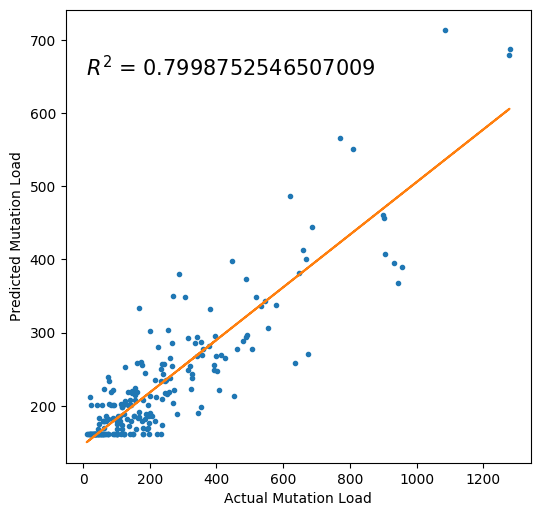

In [306]:
import matplotlib.pyplot as plt
import scipy
from numpy.polynomial.polynomial import polyfit

rval = scipy.stats.linregress(y, prediction)[2]
rval2 = rval*rval
rval2string = rval2.astype('str')
fig, ax = plt.subplots(figsize=(6,6), dpi=100)
b, m = polyfit(y, prediction, 1)
plt.plot(y, prediction, '.')
plt.plot(y, b + m * y, '-')
plt.xlabel("Actual Mutation Load")
plt.ylabel("Predicted Mutation Load")
ax.text(10, 650, f"$R^2$ = {rval2string}", fontsize=15)
plt.show()

In [307]:
# Finding out which genes were used
count = 0
for x in model.coef_:
  if x != 0:
    print(candidate_genes3.index[count])
    print(x)
  count += 1
print(model.intercept_)

ADAMTS12
21.793580865106115
APOB
23.392836686830655
CNTNAP2
7.969827567142535
CSMD2
11.499738725980997
CSMD3
38.94735208171054
FLG
19.948230921806804
LRP1B
17.672184264338078
MXRA5
9.687254405001557
NRXN1
35.855199139463764
TSHZ2
23.270769428977736
XIRP2
16.50606372290055
ZFHX4
6.827691685919276
162.12393965903385


The result seems kind of suspicious, but I'm going to keep moving forward. Now we have to load in the Imielinski and Rizvi data

In [308]:
# Load in other data
# First is Imielinski
imi_file = "mmc4.txt"

pd.set_option('display.max_columns', None)

imi = pd.read_csv(imi_file, sep="\t", comment='#')

imi = imi[imi.Variant_Classification.isin(variant_list)]

imi2 = imi[["Hugo_Symbol","Variant_Type","Tumor_Sample_Barcode"]]
imi2['Variant_Type2'] = imi2.apply(lambda row: d[row.Variant_Type], axis = 1)
imi2 = imi2.drop(['Variant_Type'], axis=1)
imi2["Variant_Type2"] = pd.to_numeric(imi2["Variant_Type2"])

mutation_matrix_imi = imi2.pivot_table(index="Hugo_Symbol",columns="Tumor_Sample_Barcode",values="Variant_Type2",aggfunc=np.sum)
display(mutation_matrix_imi)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Tumor_Sample_Barcode,LU-A08-43-Tumor,LUAD-2GUGK-Tumor,LUAD-5O6B5-Tumor,LUAD-5V8LT-Tumor,LUAD-74TBW-Tumor,LUAD-AEIUF-Tumor,LUAD-B00416-Tumor,LUAD-B00523-Tumor,LUAD-B00859-Tumor,LUAD-B00915-Tumor,LUAD-B01102-Tumor,LUAD-B01145-Tumor,LUAD-B01169-Tumor,LUAD-B01811-Tumor,LUAD-B01970-Tumor,LUAD-B02077-Tumor,LUAD-B02216-Tumor,LUAD-B02477-Tumor,LUAD-B02515-Tumor,LUAD-B02594-Tumor,LUAD-CHTN-3090346-Tumor,LUAD-CHTN-3090415-Tumor,LUAD-CHTN-3090416-Tumor,LUAD-CHTN-4090680-Tumor,LUAD-CHTN-MAD04-00674-Tumor,LUAD-CHTN-MAD06-00490-Tumor,LUAD-CHTN-MAD06-00668-Tumor,LUAD-CHTN-MAD06-00678-Tumor,LUAD-CHTN-MAD08-00104-Tumor,LUAD-CHTN-Z4716A-Tumor,LUAD-D00147-Tumor,LUAD-D01278-Tumor,LUAD-D01382-Tumor,LUAD-D01603-Tumor,LUAD-D01751-Tumor,LUAD-D02085-Tumor,LUAD-D02185-Tumor,LUAD-D02326-Tumor,LUAD-E00163-Tumor,LUAD-E00443-Tumor,LUAD-E00897-Tumor,LUAD-E00918-Tumor,LUAD-E00934-Tumor,LUAD-E01014-Tumor,LUAD-E01278-Tumor,LUAD-E01317-Tumor,LUAD-F00018-Tumor,LUAD-F00057-Tumor,LUAD-F00089-Tumor,LUAD-F00121-Tumor,LUAD-F00134-Tumor,LUAD-F00162-Tumor,LUAD-F00170-Tumor,LUAD-F00257-Tumor,LUAD-F00282-Tumor,LUAD-F00365-Tumor,LUAD-F00368-Tumor,LUAD-FH5PJ-Tumor,LUAD-GU4I3-Tumor,LUAD-LC15C-Tumor,LUAD-LIP77-Tumor,LUAD-NYU1021-Tumor,LUAD-NYU1026-Tumor,LUAD-NYU1027-Tumor,LUAD-NYU1051S-Tumor,LUAD-NYU1093-Tumor,LUAD-NYU1096-Tumor,LUAD-NYU1101-Tumor,LUAD-NYU1124-Tumor,LUAD-NYU1128-Tumor,LUAD-NYU1142-Tumor,LUAD-NYU1177-Tumor,LUAD-NYU1195-Tumor,LUAD-NYU1210-Tumor,LUAD-NYU1219-Tumor,LUAD-NYU129-Tumor,LUAD-NYU160-Tumor,LUAD-NYU184-Tumor,LUAD-NYU195-Tumor,LUAD-NYU201-Tumor,LUAD-NYU213-Tumor,LUAD-NYU252-Tumor,LUAD-NYU259-Tumor,LUAD-NYU263-Tumor,LUAD-NYU282-Tumor,LUAD-NYU284-Tumor,LUAD-NYU287-Tumor,LUAD-NYU315-Tumor,LUAD-NYU330-Tumor,LUAD-NYU408-Tumor,LUAD-NYU508-Tumor,LUAD-NYU574S-Tumor,LUAD-NYU575-Tumor,LUAD-NYU584S-Tumor,LUAD-NYU605-Tumor,LUAD-NYU608-Tumor,LUAD-NYU627-Tumor,LUAD-NYU669-Tumor,LUAD-NYU689-Tumor,LUAD-NYU696-Tumor,LUAD-NYU704-Tumor,LUAD-NYU735-Tumor,LUAD-NYU739-Tumor,LUAD-NYU796-Tumor,LUAD-NYU802-Tumor,LUAD-NYU803-Tumor,LUAD-NYU846-Tumor,LUAD-NYU847-Tumor,LUAD-NYU848-Tumor,LUAD-NYU947-Tumor,LUAD-NYU994-Tumor,LUAD-QCHM7-Tumor,LUAD-QJN9L-Tumor,LUAD-QY22Z-Tumor,LUAD-RT-S01477-Tumor,LUAD-RT-S01487-Tumor,LUAD-RT-S01699-Tumor,LUAD-RT-S01700-Tumor,LUAD-RT-S01702-Tumor,LUAD-RT-S01703-Tumor,LUAD-RT-S01709-Tumor,LUAD-RT-S01711-Tumor,LUAD-RT-S01721-Tumor,LUAD-RT-S01769-Tumor,LUAD-RT-S01770-Tumor,LUAD-RT-S01771-Tumor,LUAD-RT-S01774-Tumor,LUAD-RT-S01777-Tumor,LUAD-RT-S01808-Tumor,LUAD-RT-S01810-Tumor,LUAD-RT-S01813-Tumor,LUAD-RT-S01818-Tumor,LUAD-RT-S01831-Tumor,LUAD-RT-S01832-Tumor,LUAD-RT-S01840-Tumor,LUAD-RT-S01852-Tumor,LUAD-RT-S01856-Tumor,LUAD-RT-S01866-Tumor,LUAD-S00484-Tumor,LUAD-S00486-Tumor,LUAD-S00488-Tumor,LUAD-S00499-Tumor,LUAD-S01302-Tumor,LUAD-S01304-Tumor,LUAD-S01306-Tumor,LUAD-S01315-Tumor,LUAD-S01320-Tumor,LUAD-S01331-Tumor,LUAD-S01341-Tumor,LUAD-S01345-Tumor,LUAD-S01346-Tumor,LUAD-S01354-Tumor,LUAD-S01356-Tumor,LUAD-S01357-Tumor,LUAD-S01362-Tumor,LUAD-S01373-Tumor,LUAD-S01381-Tumor,LUAD-S01404-Tumor,LUAD-S01405-Tumor,LUAD-S01409-Tumor,LUAD-S01413-Tumor,LUAD-S01467-Tumor,LUAD-S01478-Tumor,LUAD-S01482-Tumor,LUAD-TLLGS-Tumor,LUAD-U6SJ7-Tumor,LUAD-UF7HM-Tumor,LUAD-VUMN6-Tumor,LUAD-YINHD-Tumor,LUAD-YKER9-Tumor,LUAD_E00522-Tumor,LUAD_E00565-Tumor,LUAD_E00623-Tumor,LUAD_E00703-Tumor,LUAD_E00945-Tumor,LUAD_E01047-Tumor,LUAD_E01086-Tumor,LUAD_E01147-Tumor,LUAD_E01166-Tumor,LUAD_E01319-Tumor,LUAD_E01419-Tumor
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A1BG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [309]:
riz_file = "aaa1348_TableS5.xlsx"

pd.set_option('display.max_columns', None)

riz = pd.read_excel(riz_file, header=6)

#display(riz)
#have to remove some patients
# Looking through the Rizvi table s3 excel file, we can identify the 4 patients that need to be removed
to_remove = ['CU9061','SB010944','SR070761','GR4788']

riz = riz[~riz.Sample.isin(to_remove)]
#display(riz)

row_length = riz.Gene.nunique()
col_length = riz.Sample.nunique()
rows = riz.Gene.unique()
cols = riz.Sample.unique()

mutation_matrix_riz = pd.DataFrame(np.zeros((row_length, col_length)), columns = cols, index = rows)
#display(mutation_matrix_riz)

for index, row in riz.iterrows():
  mutation_matrix_riz.loc[row.Gene, row.Sample] = mutation_matrix_riz.loc[row.Gene, row.Sample] + 1
display(mutation_matrix_riz)

,AL4602,AU5884,BL3403,CA9903,DI6359,DM123062,FR9547,GR0134,HE3202,JB112852,KA3947,LO3793,LO5004,M4945,MA7027,NI9507,R7495_2,RH090935,RI1933,RO3338,SA9755,SC0899,SC6470,TU0428,VA1330,VA7859,WA7899,Y2087,ZA6505,ZA6965
ACAP3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
VWA1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MIB2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H6PD,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CASZ1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TOR4A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
DPH7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
UBA1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
DACH2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [310]:
imi_mut_load = mutation_matrix_imi.sum(axis=0)
display(imi_mut_load)
riz_mut_load = mutation_matrix_riz.sum(axis=0)
display(riz_mut_load)

Tumor_Sample_Barcode
LU-A08-43-Tumor        54.0
LUAD-2GUGK-Tumor      231.0
LUAD-5O6B5-Tumor       31.0
LUAD-5V8LT-Tumor     1668.0
LUAD-74TBW-Tumor      294.0
                      ...  
LUAD_E01086-Tumor      98.0
LUAD_E01147-Tumor     217.0
LUAD_E01166-Tumor     132.0
LUAD_E01319-Tumor      32.0
LUAD_E01419-Tumor      67.0
Length: 181, dtype: float64

AL4602       244.0
AU5884        34.0
BL3403       148.0
CA9903       324.0
DI6359       228.0
DM123062     134.0
FR9547       290.0
GR0134        56.0
HE3202       746.0
JB112852     190.0
KA3947       302.0
LO3793       109.0
LO5004        79.0
M4945        427.0
MA7027       292.0
NI9507        35.0
R7495_2      122.0
RH090935     201.0
RI1933       473.0
RO3338       106.0
SA9755      1192.0
SC0899       296.0
SC6470       185.0
TU0428       626.0
VA1330        44.0
VA7859        11.0
WA7899       127.0
Y2087        507.0
ZA6505       378.0
ZA6965       223.0
dtype: float64

0.41291345435068194

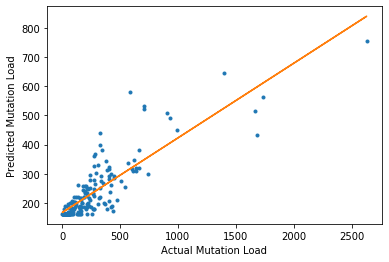

0.7265142938266717


In [311]:
# Imielinski data prediction
imi_x = mutation_matrix_imi[mutation_matrix_imi.index.isin(candidate_genes3.index)].transpose()
imi_x = imi_x.fillna(0)
imi_y = imi_mut_load.transpose()
imi_prediction = model.predict(imi_x)
display(model.score(imi_x,imi_y))
#display(imi_x)
rval_imi = scipy.stats.linregress(imi_y, imi_prediction)[2]
rval2_imi = rval_imi*rval_imi
rval2string_imi = rval2_imi.astype('str')
fig = plt.figure()
ax = fig.add_subplot(111)
b, m = polyfit(imi_y, imi_prediction, 1)
plt.plot(imi_y, imi_prediction, '.')
plt.plot(imi_y, b + m * imi_y, '-')
plt.xlabel("Actual Mutation Load")
plt.ylabel("Predicted Mutation Load")
#ax.text(1, 2, f"$R^2$ = {rval2string_imi}", fontsize=15)
plt.show()
print(rval2string_imi)

0.3069821256817146

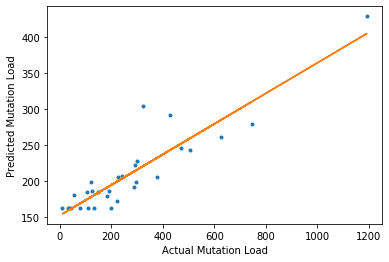

0.8271963102083651


In [312]:
#Rizvi data prediction
riz_x = mutation_matrix_riz[mutation_matrix_riz.index.isin(candidate_genes3.index)].transpose()
riz_x = riz_x.fillna(0)
riz_y = riz_mut_load.transpose()
riz_prediction = model.predict(riz_x)
display(model.score(riz_x,riz_y))
#display(riz_x)
rval_riz = scipy.stats.linregress(riz_y, riz_prediction)[2]
rval2_riz = rval_riz*rval_riz
rval2string_riz = rval2_riz.astype('str')
fig = plt.figure()
ax = fig.add_subplot(111)
b, m = polyfit(riz_y, riz_prediction, 1)
plt.plot(riz_y, riz_prediction, '.')
plt.plot(riz_y, b + m * riz_y, '-')
plt.xlabel("Actual Mutation Load")
plt.ylabel("Predicted Mutation Load")
#ax.text(0.95, 0.01, f"$R^2$ = {rval2string_riz}", fontsize=15)
plt.show()
print(rval2string_riz)

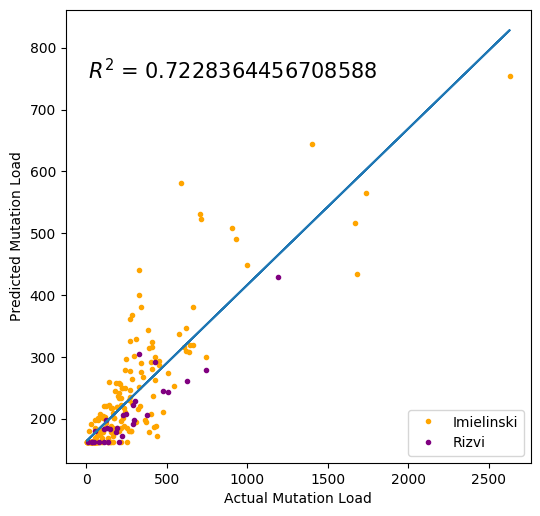

0.7228364456708588


In [313]:
#display(type(riz_y))
combined_y= riz_y.append(imi_y)
#display(combined)
#display(riz_prediction)
combined_pred = np.append(riz_prediction, imi_prediction)
#display(riz_prediction)
#display(combined_pred[0:len(riz_prediction)])

rval_combined = scipy.stats.linregress(combined_y, combined_pred)[2]
rval2_combined = rval_combined*rval_combined
rval2string_combined = rval2_combined.astype('str')
fig, ax = plt.subplots(figsize=(6,6), dpi=100)
b, m = polyfit(combined_y, combined_pred, 1)
#plt.plot(combined_y, combined_pred, '.')
plt.plot(imi_y,imi_prediction, '.', c='orange', label = 'Imielinski')
plt.plot(riz_y,riz_prediction, '.', c='purple', label = 'Rizvi')
plt.plot(combined_y, b + m * combined_y, '-')
plt.legend(loc='lower right')
plt.xlabel("Actual Mutation Load")
plt.ylabel("Predicted Mutation Load")
ax.text(10, 750, f"$R^2$ = {rval2string_combined}", fontsize=15)
plt.show()
print(rval2string_combined)

Next step is to try to recreate the survival curve with the Rizvi data

In [314]:
# Making new dataframe with survival data
#
#display(riz_prediction)
#display(riz_y)
riz_survival = pd.DataFrame(riz_prediction, index=riz_y.index, columns=['prediction'])
#display(riz_survival)

# Had weird issue where the name of an index got changed
index_tofix = riz_survival.index[-14]
riz_survival = riz_survival.rename(index={index_tofix: 'R7495'})
#display(riz_survival)
#display(riz_survival.columns)
#riz_survival = riz_survival.rename(columns={"index": "Study ID", "prediction": "prediction"})
#display(riz_survival)
#riz_survival['predictions'] = riz_prediction
#riz_survival['prediction'] = riz_prediction.tolist()
#display(riz_y)
#display(riz_survival.head())

riz_file2 = "aaa1348_TableS3.xlsx"

pd.set_option('display.max_columns', None)

riz2 = pd.read_excel(riz_file2, header=1, nrows=34)

#display(riz)
#have to remove some patients
# Looking through the Rizvi table s3 excel file, we can identify the 4 patients that need to be removed
#to_remove = ['CU9061','SB010944','SR070761','GR4788']

#riz = riz[~riz.Sample.isin(to_remove)]
#display(riz2)
riz2 = riz2[~riz2['Study ID'].isin(to_remove)]
#display(riz2)
riz_survival = riz_survival.reset_index()
#display(riz2)
#display(riz_survival)
riz_survival = riz_survival.rename(columns={"index": "Study ID", "prediction": "prediction"})
#display(riz2)
#display(riz_survival)
riz2 = riz2.set_index(['Study ID'])
#display(riz2)
riz2 = riz2[['PFS (mos)','Event ^^^']]
#display(riz2)
riz_survival = pd.merge(riz_survival,riz2[['PFS (mos)','Event ^^^']], on="Study ID", how="left")
display(riz_survival)
#display(to_remove)

,Study ID,prediction,PFS (mos),Event ^^^
0,AL4602,207.310357,8.366667,0
1,AU5884,162.123940,1.833333,1
2,BL3403,183.917521,6.500000,1
3,CA9903,304.674628,14.500000,1
4,DI6359,205.465007,9.800000,0
5,DM123062,162.123940,1.900000,1
6,FR9547,191.295863,4.200000,0
7,GR0134,179.796124,8.300000,1
8,HE3202,278.898648,14.666667,0
9,JB112852,185.123417,3.266667,1


In [315]:
riz_survival = riz_survival.sort_values(by=['prediction'])
display(riz_survival)
# 190 is halfway prediction point


,Study ID,prediction,PFS (mos),Event ^^^
1,AU5884,162.123940,1.833333,1
17,RH090935,162.123940,10.433333,0
15,NI9507,162.123940,1.866667,1
5,DM123062,162.123940,1.900000,1
12,LO5004,162.123940,6.300000,1
25,VA7859,162.123940,6.266667,1
11,LO3793,162.123940,3.500000,1
24,VA1330,162.123940,4.133333,1
29,ZA6965,171.811194,4.433333,0
22,SC6470,178.630003,8.333333,1


Text(0, 0.5, 'Progression-Free Survival')

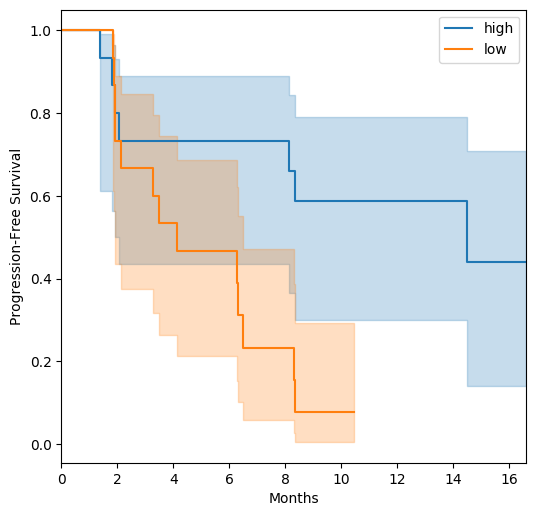

In [316]:
fig, ax = plt.subplots(figsize=(6,6), dpi=100)
from lifelines import KaplanMeierFitter
low = riz_survival['prediction'] < 190
kmf = KaplanMeierFitter()

#riz_high_idx = pd2.logMutationCount >= 2
riz_survival = riz_survival.rename(columns={"index": "Study ID", "prediction": "prediction", "PFS (mos)": "PFS", "Event ^^^": "Event"})
kmf.fit(riz_survival.PFS[~low], riz_survival.Event[~low],
        label="high")

kmf.plot(ax=ax)
kmf.fit(riz_survival.PFS[low], riz_survival.Event[low],
        label="low")
kmf.plot(ax=ax)
plt.xlabel("Months")
plt.ylabel("Progression-Free Survival")

In [317]:
# Also can get log rank test
from lifelines.statistics import logrank_test

results = logrank_test(riz_survival.PFS[low], riz_survival.PFS[~low])

print(results.p_value)

0.008633069640844203


In [318]:
# we can also do a cox PH calculation
from lifelines import CoxPHFitter

cph = CoxPHFitter()
riz_cox = riz_survival.copy()
riz_cox = riz_cox.set_index(["Study ID"])


cph.fit(riz_cox, duration_col='PFS', event_col='Event')
display(cph.summary)

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
prediction,-0.014985,0.985127,0.006728,-0.02817,-0.001799,0.972223,0.998203,-2.227386,0.025922,5.269706


Next task is to generate ROC curve

428.99878200150545

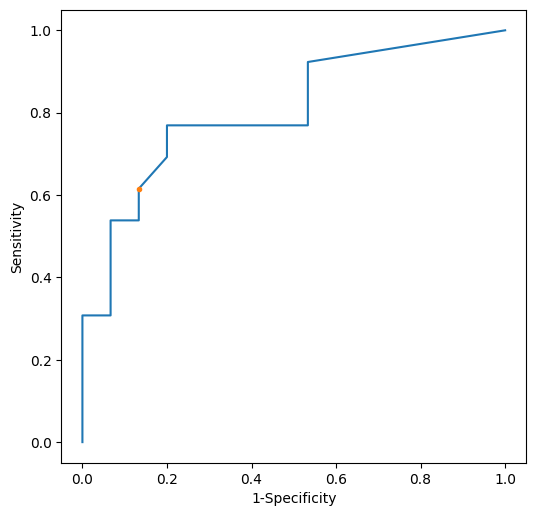

In [319]:
from sklearn.metrics import roc_curve
riz_roc = riz_survival.copy()
#display(riz_roc)
riz_roc = riz_roc.set_index(['Study ID'])
#display(riz_roc)
index_tofix = riz_roc.index[-14]
riz_roc = riz_roc.rename(index={index_tofix: 'R7495_2'})
#display(riz_cox)
riz_roc = riz_roc.merge(riz_mut_load.to_frame(), left_index=True, right_index=True)
#display(riz_roc)
index_tofix = riz_roc.index[-14]
riz_roc = riz_roc.rename(index={index_tofix: 'R7495'})

riz_roc = riz_roc.drop(['PFS'], axis=1)
riz_roc = riz_roc.drop(['Event'], axis=1)

riz_roc.columns = ['prediction', 'mut_load']
riz3 = pd.read_excel(riz_file2, header=1, nrows=34)
riz3 = riz3[~riz3['Study ID'].isin(to_remove)]
riz3 = riz3.set_index(['Study ID'])
riz3 = riz3[['Durable Clinical Benefit']]
#display(riz3)

riz_roc = pd.merge(riz_roc,riz3['Durable Clinical Benefit'], left_index=True, right_index=True)
#drop NR's
riz_roc = riz_roc.drop(riz_roc.index[[8,15]])
riz_roc.columns = ['prediction', 'mut_load','dcb']
riz_roc['dcb'] = riz_roc.dcb == 'DCB'
maxpred = max(riz_roc.prediction)
display(maxpred)
riz_roc['y'] = riz_roc.prediction/maxpred

fpr, tpr, threshold = roc_curve(riz_roc.dcb, riz_roc.prediction)
fig, ax = plt.subplots(figsize=(6,6), dpi = 100)
plt.plot(fpr, tpr, '-')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
# got point from fpr and tpr midpoints
plt.plot(0.13333333,0.61538462, '.')
plt.show()

#display(riz_roc)
#display(riz_mut_load)

Lastly, generate immunotherapy response prediction

In [320]:
#calculate the threshold from roc plot
from sklearn.metrics import roc_auc_score
print(roc_auc_score(riz_roc.dcb,riz_roc.prediction))
# I'm not sure if this is right
minpred = min(riz_roc.prediction)
thresh = 0.13333333 * (maxpred-minpred) + minpred
print(thresh)
riz_roc['roc_thresh'] = riz_roc.prediction > thresh
riz_roc['truepos'] = ((riz_roc.dcb == True) & (riz_roc.roc_thresh == True))
riz_roc['falsepos'] = ((riz_roc.dcb == False) & (riz_roc.roc_thresh == True))
riz_roc['trueneg'] = ((riz_roc.dcb == False) & (riz_roc.roc_thresh == False))
riz_roc['falseneg'] = ((riz_roc.dcb == True) & (riz_roc.roc_thresh == False))
display(riz_roc)

0.8051282051282052
197.70725108178058


,prediction,mut_load,dcb,y,roc_thresh,truepos,falsepos,trueneg,falseneg
AU5884,162.123940,34.0,False,0.377912,False,False,False,True,False
RH090935,162.123940,201.0,True,0.377912,False,False,False,False,True
NI9507,162.123940,35.0,False,0.377912,False,False,False,True,False
DM123062,162.123940,134.0,False,0.377912,False,False,False,True,False
LO5004,162.123940,79.0,False,0.377912,False,False,False,True,False
VA7859,162.123940,11.0,False,0.377912,False,False,False,True,False
LO3793,162.123940,109.0,False,0.377912,False,False,False,True,False
VA1330,162.123940,44.0,False,0.377912,False,False,False,True,False
SC6470,178.630003,185.0,True,0.416388,False,False,False,False,True
GR0134,179.796124,56.0,True,0.419106,False,False,False,False,True


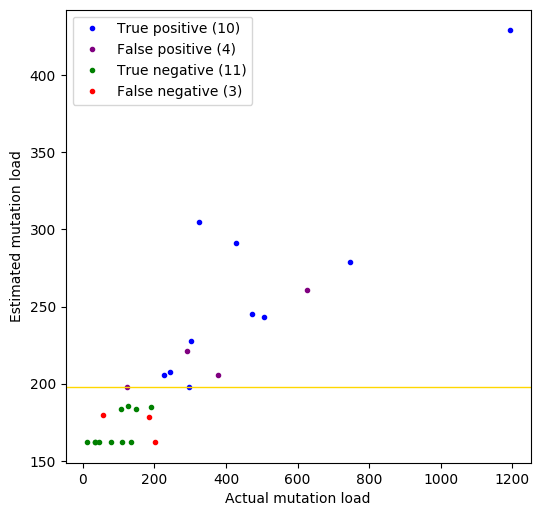

In [325]:
fig, ax = plt.subplots(figsize=(6,6), dpi = 100)
plt.plot(riz_roc.loc[riz_roc['truepos'] == True, ['mut_load']], riz_roc.loc[riz_roc['truepos'] == True, ['prediction']],'.',color='blue',label='True positive (10)')
plt.plot(riz_roc.loc[riz_roc['falsepos'] == True, ['mut_load']], riz_roc.loc[riz_roc['falsepos'] == True, ['prediction']],'.',color='purple',label='False positive (4)')
plt.plot(riz_roc.loc[riz_roc['trueneg'] == True, ['mut_load']], riz_roc.loc[riz_roc['trueneg'] == True, ['prediction']],'.',color='green',label='True negative (11)')
plt.plot(riz_roc.loc[riz_roc['falseneg'] == True, ['mut_load']], riz_roc.loc[riz_roc['falseneg'] == True, ['prediction']],'.',color='red',label='False negative (3)')
ax.axhline(y=thresh, linewidth=1, color='gold')
plt.xlabel('Actual mutation load')
plt.ylabel('Estimated mutation load')
plt.legend(loc='upper left')
plt.show()


In [326]:
display(candidate_genes3)

,CDS,Counts,p,NCBI gene ID
Hugo_Symbol,,,,
ADAMTS12,4785.0,0.226087,3.948764e-10,81792.0
ANK2,11988.0,0.191304,3.256137e-07,287.0
APOB,13692.0,0.213043,2.143867e-10,338.0
ASPM,10434.0,0.139130,2.234243e-07,259266.0
ASTN1,3885.0,0.160870,8.096932e-07,460.0
...,...,...,...,...
ZFHX4,10851.0,0.404348,7.270670e-12,79776.0
ZNF208,3843.0,0.108696,1.154468e-07,7757.0
ZNF536,3903.0,0.213043,5.387452e-08,9745.0
